In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
iris = pd.read_csv('iris.csv')
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
iris.shape

(150, 6)

In [14]:
required_col = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']
Target_col = 'Species'

def mapping_category(species):
    if species=='Iris-setosa':
        return 0
    elif species=='Iris-versicolor':
        return 1
    else: 
        return 2
iris['CLASS'] = iris[Target_col].apply(mapping_category)

In [ ]:
X = iris[required_col]
Y = iris['CLASS']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)



In [19]:
import seaborn as sns

--- Training Set Distribution ---
Value Counts:
CLASS
1    35
2    34
0    31
Name: count, dtype: int64

Percentages:
CLASS
1    0.35
2    0.34
0    0.31
Name: proportion, dtype: float64


--- Testing Set Distribution ---
Value Counts:
CLASS
0    19
2    16
1    15
Name: count, dtype: int64

Percentages in Test Data:
CLASS
0    0.38
2    0.32
1    0.30
Name: proportion, dtype: float64




C:\Users\Rahul\AppData\Local\Temp\ipykernel_33728\342177583.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='pastel')
C:\Users\Rahul\AppData\Local\Temp\ipykernel_33728\342177583.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=axes[1], palette='pastel')


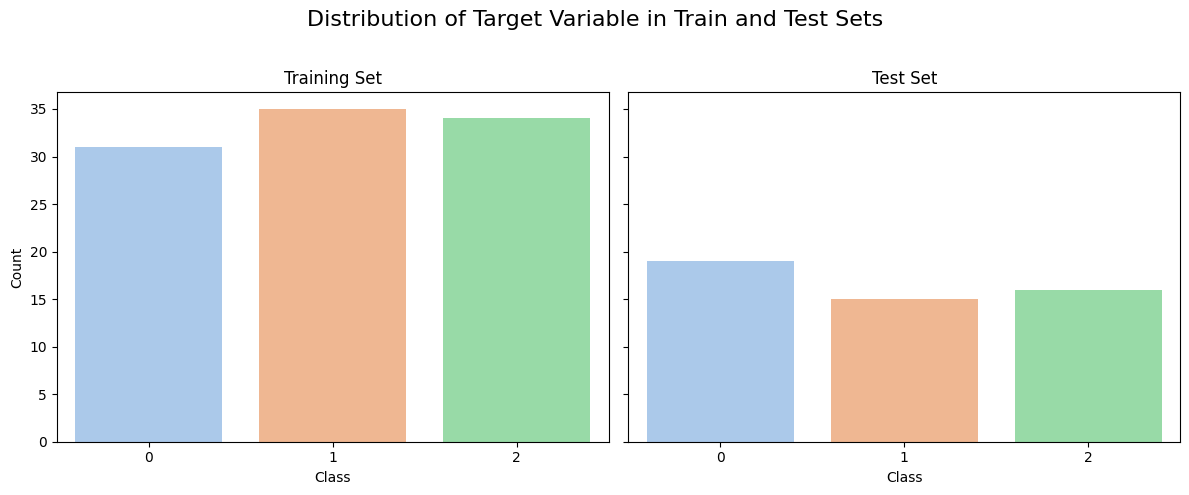

--- Comparison of Proportions ---
      Original % Train %  Test %
CLASS                           
0         33.33%  31.00%  38.00%
1         33.33%  35.00%  30.00%
2         33.33%  34.00%  32.00%


In [21]:
train_counts = y_train.value_counts()
train_percentages = y_train.value_counts(normalize=True)

# Get the value counts for the testing set
test_counts = y_test.value_counts()
test_percentages = y_test.value_counts(normalize=True)

print("--- Training Set Distribution ---")
print("Value Counts:")
print(train_counts)
print("\nPercentages:")
print(train_percentages)
print("\n" + "="*40 + "\n")


print("--- Testing Set Distribution ---")
print("Value Counts:")
print(test_counts)
print("\nPercentages in Test Data:")
print(test_percentages)
print("\n" + "="*40 + "\n")


# --- 4. Visualize the Distributions ---
# A visual check is often the most effective way to compare.

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle('Distribution of Target Variable in Train and Test Sets', fontsize=16)

# Plot for Training Set
sns.countplot(x=y_train, ax=axes[0], palette='pastel')
axes[0].set_title('Training Set')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Plot for Testing Set
sns.countplot(x=y_test, ax=axes[1], palette='pastel')
axes[1].set_title('Test Set')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('') # Hide y-label as it's shared

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Create a DataFrame for easy comparison ---
comparison_df = pd.DataFrame({
    'Original %': Y.value_counts(normalize=True),
    'Train %': train_percentages,
    'Test %': test_percentages,
})
comparison_df['Train %'] = comparison_df['Train %'].map('{:.2%}'.format)
comparison_df['Test %'] = comparison_df['Test %'].map('{:.2%}'.format)
comparison_df['Original %'] = comparison_df['Original %'].map('{:.2%}'.format)


print("--- Comparison of Proportions ---")
print(comparison_df)

In [24]:
iris.CLASS.value_counts(normalize=True)

CLASS
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

In [38]:
neigh = KNeighborsClassifier(n_neighbors=50)
model = neigh.fit(X_train,y_train) # model KNN = 3-NN
predicted_labels = model.predict(X_test)


In [ ]:
# X_test['Predicted_class'] = predicted_labels
# X_test['Actual_class']= y_test

In [33]:
# X_test

In [39]:
accuracy_score(y_test,predicted_labels)

0.92